In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.columns = df.columns.str.lower()

### EDA

In [5]:
df.columns

Index(['patientid', 'age', 'gender', 'ethnicity', 'educationlevel', 'bmi',
       'smoking', 'alcoholconsumption', 'physicalactivity', 'dietquality',
       'sleepquality', 'familyhistoryalzheimers', 'cardiovasculardisease',
       'diabetes', 'depression', 'headinjury', 'hypertension', 'systolicbp',
       'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl',
       'cholesteroltriglycerides', 'mmse', 'functionalassessment',
       'memorycomplaints', 'behavioralproblems', 'adl', 'confusion',
       'disorientation', 'personalitychanges', 'difficultycompletingtasks',
       'forgetfulness', 'diagnosis', 'doctorincharge'],
      dtype='object')

In [6]:
df.dtypes

patientid                      int64
age                            int64
gender                         int64
ethnicity                      int64
educationlevel                 int64
bmi                          float64
smoking                        int64
alcoholconsumption           float64
physicalactivity             float64
dietquality                  float64
sleepquality                 float64
familyhistoryalzheimers        int64
cardiovasculardisease          int64
diabetes                       int64
depression                     int64
headinjury                     int64
hypertension                   int64
systolicbp                     int64
diastolicbp                    int64
cholesteroltotal             float64
cholesterolldl               float64
cholesterolhdl               float64
cholesteroltriglycerides     float64
mmse                         float64
functionalassessment         float64
memorycomplaints               int64
behavioralproblems             int64
a

In [7]:
df.isnull().sum()

patientid                    0
age                          0
gender                       0
ethnicity                    0
educationlevel               0
bmi                          0
smoking                      0
alcoholconsumption           0
physicalactivity             0
dietquality                  0
sleepquality                 0
familyhistoryalzheimers      0
cardiovasculardisease        0
diabetes                     0
depression                   0
headinjury                   0
hypertension                 0
systolicbp                   0
diastolicbp                  0
cholesteroltotal             0
cholesterolldl               0
cholesterolhdl               0
cholesteroltriglycerides     0
mmse                         0
functionalassessment         0
memorycomplaints             0
behavioralproblems           0
adl                          0
confusion                    0
disorientation               0
personalitychanges           0
difficultycompletingtasks    0
forgetfu

In [8]:
df.nunique()

patientid                    2149
age                            31
gender                          2
ethnicity                       4
educationlevel                  4
bmi                          2149
smoking                         2
alcoholconsumption           2149
physicalactivity             2149
dietquality                  2149
sleepquality                 2149
familyhistoryalzheimers         2
cardiovasculardisease           2
diabetes                        2
depression                      2
headinjury                      2
hypertension                    2
systolicbp                     90
diastolicbp                    60
cholesteroltotal             2149
cholesterolldl               2149
cholesterolhdl               2149
cholesteroltriglycerides     2149
mmse                         2149
functionalassessment         2149
memorycomplaints                2
behavioralproblems              2
adl                          2149
confusion                       2
disorientation

In [9]:
df.columns[df.nunique() == 2]

Index(['gender', 'smoking', 'familyhistoryalzheimers', 'cardiovasculardisease',
       'diabetes', 'depression', 'headinjury', 'hypertension',
       'memorycomplaints', 'behavioralproblems', 'confusion', 'disorientation',
       'personalitychanges', 'difficultycompletingtasks', 'forgetfulness',
       'diagnosis'],
      dtype='object')

In [10]:
df[df.columns[df.nunique() == 2]]

,gender,smoking,familyhistoryalzheimers,cardiovasculardisease,diabetes,depression,headinjury,hypertension,memorycomplaints,behavioralproblems,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2145,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2147,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [11]:
df.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [12]:
ethnicity = {
    0: 'caucasian',
    1: 'african american',
    2: 'asian',
    3: 'other'
}

df['ethnicity'] = df['ethnicity'].map(ethnicity)

education_values = {
    0: 'none',
    1: 'high school',
    2: 'bachelor\'s',
    3: 'higher'
}

df['educationlevel'] = df['educationlevel'].map(education_values)


In [13]:
df.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
0,4751,73,0,caucasian,bachelor's,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,caucasian,none,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,other,high school,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,caucasian,high school,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,caucasian,none,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [14]:
df.dtypes

patientid                      int64
age                            int64
gender                         int64
ethnicity                     object
educationlevel                object
bmi                          float64
smoking                        int64
alcoholconsumption           float64
physicalactivity             float64
dietquality                  float64
sleepquality                 float64
familyhistoryalzheimers        int64
cardiovasculardisease          int64
diabetes                       int64
depression                     int64
headinjury                     int64
hypertension                   int64
systolicbp                     int64
diastolicbp                    int64
cholesteroltotal             float64
cholesterolldl               float64
cholesterolhdl               float64
cholesteroltriglycerides     float64
mmse                         float64
functionalassessment         float64
memorycomplaints               int64
behavioralproblems             int64
a

In [15]:
df[df.columns[df.dtypes == 'object']]


,ethnicity,educationlevel,doctorincharge
0,caucasian,bachelor's,XXXConfid
1,caucasian,none,XXXConfid
2,other,high school,XXXConfid
3,caucasian,high school,XXXConfid
4,caucasian,none,XXXConfid
...,...,...,...
2144,caucasian,high school,XXXConfid
2145,caucasian,bachelor's,XXXConfid
2146,caucasian,high school,XXXConfid
2147,other,high school,XXXConfid


In [16]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [17]:
df[df.columns[df.dtypes == 'object']]

,ethnicity,educationlevel,doctorincharge
0,caucasian,bachelor's,xxxconfid
1,caucasian,none,xxxconfid
2,other,high_school,xxxconfid
3,caucasian,high_school,xxxconfid
4,caucasian,none,xxxconfid
...,...,...,...
2144,caucasian,high_school,xxxconfid
2145,caucasian,bachelor's,xxxconfid
2146,caucasian,high_school,xxxconfid
2147,other,high_school,xxxconfid


In [18]:
categorical = ['gender', 'smoking', 'familyhistoryalzheimers', 'cardiovasculardisease',
       'diabetes', 'depression', 'headinjury', 'hypertension',
       'memorycomplaints', 'behavioralproblems', 'confusion', 'disorientation',
       'personalitychanges', 'difficultycompletingtasks', 'forgetfulness', 'ethnicity', 'educationlevel']

In [19]:
numerical = list(set(df.columns) - set(categorical))
numerical

['diastolicbp',
 'physicalactivity',
 'sleepquality',
 'diagnosis',
 'cholesteroltriglycerides',
 'alcoholconsumption',
 'systolicbp',
 'mmse',
 'bmi',
 'patientid',
 'functionalassessment',
 'age',
 'cholesteroltotal',
 'adl',
 'cholesterolhdl',
 'doctorincharge',
 'cholesterolldl',
 'dietquality']

make numerical, any other eda, remove unwanted columns, split

In [20]:
#not considering doctor since only one element
numerical.remove('doctorincharge')

In [21]:
numerical.remove('patientid')

In [22]:
numerical.remove('diagnosis')

In [23]:
len(numerical)

15

splitting dataset

In [24]:
from sklearn.model_selection import train_test_split   

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(1719, 430)

In [26]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(1289, 430)

In [27]:
df_train

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
1459,6210,73,0,caucasian,higher,27.189229,0,16.285787,8.590148,8.564807,...,0,0,0.249077,0,0,0,1,1,0,xxxconfid
256,5007,70,1,caucasian,higher,29.293859,0,7.590791,3.363867,6.588507,...,0,0,5.724693,1,0,0,0,0,0,xxxconfid
1330,6081,86,1,african_american,none,29.336211,0,9.690369,2.615074,6.981413,...,1,0,0.839276,0,0,0,1,0,1,xxxconfid
1118,5869,65,0,african_american,none,21.022235,1,15.447170,7.075594,6.792224,...,1,1,9.313624,0,1,0,0,1,1,xxxconfid
1418,6169,62,1,caucasian,higher,22.441162,0,14.201072,7.992739,4.160335,...,0,0,7.241348,0,0,1,0,1,0,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,5916,83,1,caucasian,higher,35.005274,1,3.226572,1.924374,5.521437,...,0,0,7.131107,0,0,0,1,1,0,xxxconfid
1497,6248,61,0,asian,higher,37.953265,0,17.946262,2.661599,7.374352,...,1,0,0.431788,0,0,0,0,0,1,xxxconfid
1329,6080,77,1,asian,high_school,25.870720,0,3.716292,5.571831,9.473282,...,0,0,6.062386,0,0,0,0,0,0,xxxconfid
1697,6448,67,0,caucasian,none,26.346479,1,15.671735,9.873862,1.893701,...,0,0,7.378639,0,0,0,0,0,0,xxxconfid


In [28]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [29]:
df_train

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
0,6210,73,0,caucasian,higher,27.189229,0,16.285787,8.590148,8.564807,...,0,0,0.249077,0,0,0,1,1,0,xxxconfid
1,5007,70,1,caucasian,higher,29.293859,0,7.590791,3.363867,6.588507,...,0,0,5.724693,1,0,0,0,0,0,xxxconfid
2,6081,86,1,african_american,none,29.336211,0,9.690369,2.615074,6.981413,...,1,0,0.839276,0,0,0,1,0,1,xxxconfid
3,5869,65,0,african_american,none,21.022235,1,15.447170,7.075594,6.792224,...,1,1,9.313624,0,1,0,0,1,1,xxxconfid
4,6169,62,1,caucasian,higher,22.441162,0,14.201072,7.992739,4.160335,...,0,0,7.241348,0,0,1,0,1,0,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,5916,83,1,caucasian,higher,35.005274,1,3.226572,1.924374,5.521437,...,0,0,7.131107,0,0,0,1,1,0,xxxconfid
1285,6248,61,0,asian,higher,37.953265,0,17.946262,2.661599,7.374352,...,1,0,0.431788,0,0,0,0,0,1,xxxconfid
1286,6080,77,1,asian,high_school,25.870720,0,3.716292,5.571831,9.473282,...,0,0,6.062386,0,0,0,0,0,0,xxxconfid
1287,6448,67,0,caucasian,none,26.346479,1,15.671735,9.873862,1.893701,...,0,0,7.378639,0,0,0,0,0,0,xxxconfid


In [30]:
y_train = df_train.diagnosis.values
y_test = df_test.diagnosis.values
y_val = df_val.diagnosis.values

In [31]:
del df_train['diagnosis']
del df_test['diagnosis']
del df_val['diagnosis']

In [32]:
df_full_train

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
1584,6335,86,1,caucasian,high_school,30.266612,0,17.678579,9.608526,0.760175,...,1,0,4.474489,0,0,0,0,1,0,xxxconfid
692,5443,78,0,other,higher,27.671508,1,4.701039,5.871060,4.010200,...,1,0,7.226400,0,1,0,0,0,1,xxxconfid
587,5338,63,1,caucasian,bachelor's,26.565388,0,12.547105,2.991696,3.947475,...,0,0,2.350675,0,0,0,0,1,1,xxxconfid
1230,5981,89,1,asian,high_school,32.606677,1,15.819011,7.129810,6.687003,...,0,0,4.693290,0,0,0,0,0,0,xxxconfid
700,5451,68,1,caucasian,higher,30.451765,0,4.407421,7.775759,9.971204,...,1,0,9.357797,0,0,0,0,0,1,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,5711,64,1,caucasian,bachelor's,30.141827,1,7.136678,0.810141,9.129962,...,0,0,9.462566,0,0,0,0,1,0,xxxconfid
905,5656,61,1,african_american,bachelor's,34.531494,0,1.296193,9.174859,1.656669,...,0,0,9.856080,0,0,0,0,0,0,xxxconfid
1096,5847,74,0,caucasian,bachelor's,30.536551,1,10.881141,6.766458,7.654096,...,0,0,0.077927,1,0,1,0,0,0,xxxconfid
235,4986,90,0,african_american,none,17.359614,1,3.538268,9.245893,9.240281,...,1,1,9.557954,0,0,0,0,1,1,xxxconfid


In [33]:
df_full_train = df_full_train .reset_index(drop = True)

In [34]:
df_full_train.diagnosis.value_counts() 

diagnosis
0    1112
1     607
Name: count, dtype: int64

In [35]:
df_full_train[categorical].nunique()

gender                       2
smoking                      2
familyhistoryalzheimers      2
cardiovasculardisease        2
diabetes                     2
depression                   2
headinjury                   2
hypertension                 2
memorycomplaints             2
behavioralproblems           2
confusion                    2
disorientation               2
personalitychanges           2
difficultycompletingtasks    2
forgetfulness                2
ethnicity                    4
educationlevel               4
dtype: int64

In [36]:
diag_global = df_full_train.diagnosis.mean()
diag_global

np.float64(0.3531122745782432)

In [37]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).diagnosis.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - diag_global
    df_group['risk'] = df_group['mean'] / diag_global
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
0,0.361727,857,0.008615,1.024396
1,0.344548,862,-0.008565,0.975745


smoking


,mean,count,diff,risk
smoking,,,,
0,0.356153,1227,0.003041,1.008612
1,0.345528,492,-0.007584,0.978523


familyhistoryalzheimers


,mean,count,diff,risk
familyhistoryalzheimers,,,,
0,0.366406,1280,0.013294,1.037648
1,0.314351,439,-0.038761,0.890229


cardiovasculardisease


,mean,count,diff,risk
cardiovasculardisease,,,,
0,0.348505,1472,-0.004607,0.986954
1,0.380567,247,0.027455,1.077750


diabetes


,mean,count,diff,risk
diabetes,,,,
0,0.362832,1469,0.009720,1.027525
1,0.296000,250,-0.057112,0.838260


depression


,mean,count,diff,risk
depression,,,,
0,0.357351,1374,0.004239,1.012003
1,0.336232,345,-0.016880,0.952195


headinjury


,mean,count,diff,risk
headinjury,,,,
0,0.357143,1568,0.004031,1.011414
1,0.311258,151,-0.041854,0.881471


hypertension


,mean,count,diff,risk
hypertension,,,,
0,0.352577,1455,-0.000535,0.998485
1,0.356061,264,0.002948,1.008350


memorycomplaints


,mean,count,diff,risk
memorycomplaints,,,,
0,0.274524,1366,-0.078588,0.777442
1,0.657224,353,0.304112,1.861232


behavioralproblems


,mean,count,diff,risk
behavioralproblems,,,,
0,0.302632,1444,-0.050481,0.857041
1,0.618182,275,0.265070,1.750666


confusion


,mean,count,diff,risk
confusion,,,,
0,0.355263,1368,0.002151,1.006091
1,0.344729,351,-0.008383,0.976260


disorientation


,mean,count,diff,risk
disorientation,,,,
0,0.360279,1435,0.007166,1.020295
1,0.316901,284,-0.036211,0.897452


personalitychanges


,mean,count,diff,risk
personalitychanges,,,,
0,0.358219,1460,0.005107,1.014463
1,0.324324,259,-0.028788,0.918474


difficultycompletingtasks


,mean,count,diff,risk
difficultycompletingtasks,,,,
0,0.351928,1452,-0.001184,0.996647
1,0.359551,267,0.006438,1.018233


forgetfulness


,mean,count,diff,risk
forgetfulness,,,,
0,0.357262,1198,0.004150,1.011752
1,0.343570,521,-0.009542,0.972977


ethnicity


,mean,count,diff,risk
ethnicity,,,,
african_american,0.318059,371,-0.035053,0.900731
asian,0.377246,167,0.024133,1.068344
caucasian,0.367953,1011,0.014840,1.042027
other,0.317647,170,-0.035465,0.899564


educationlevel


,mean,count,diff,risk
educationlevel,,,,
bachelor's,0.345238,504,-0.007874,0.977701
high_school,0.362845,689,0.009732,1.027562
higher,0.303371,178,-0.049741,0.859134
none,0.370690,348,0.017577,1.049778


In [38]:
from sklearn.metrics import mutual_info_score

In [39]:
def mutual_info_diag_score(series):
    return mutual_info_score(series, df_full_train.diagnosis)

In [40]:
mi = df_full_train[categorical].apply(mutual_info_diag_score)
mi

gender                       0.000162
smoking                      0.000051
familyhistoryalzheimers      0.001142
cardiovasculardisease        0.000274
diabetes                     0.001243
depression                   0.000157
headinjury                   0.000376
hypertension                 0.000003
memorycomplaints             0.050319
behavioralproblems           0.027976
confusion                    0.000040
disorientation               0.000576
personalitychanges           0.000325
difficultycompletingtasks    0.000017
forgetfulness                0.000087
ethnicity                    0.001271
educationlevel               0.000833
dtype: float64

In [41]:
mi.sort_values(ascending = False)

memorycomplaints             0.050319
behavioralproblems           0.027976
ethnicity                    0.001271
diabetes                     0.001243
familyhistoryalzheimers      0.001142
educationlevel               0.000833
disorientation               0.000576
headinjury                   0.000376
personalitychanges           0.000325
cardiovasculardisease        0.000274
gender                       0.000162
depression                   0.000157
forgetfulness                0.000087
smoking                      0.000051
confusion                    0.000040
difficultycompletingtasks    0.000017
hypertension                 0.000003
dtype: float64

Correlation

In [42]:
df_full_train[numerical].corrwith(df_full_train.diagnosis)

diastolicbp                 0.006814
physicalactivity            0.000099
sleepquality               -0.065030
cholesteroltriglycerides    0.013868
alcoholconsumption         -0.018652
systolicbp                 -0.015629
mmse                       -0.246343
bmi                         0.026496
functionalassessment       -0.352494
age                        -0.016099
cholesteroltotal            0.012709
adl                        -0.326560
cholesterolhdl              0.064716
cholesterolldl             -0.053867
dietquality                 0.010099
dtype: float64

In [43]:
df_full_train[['physicalactivity', 'diagnosis']]

,physicalactivity,diagnosis
0,9.608526,0
1,5.871060,1
2,2.991696,1
3,7.129810,0
4,7.775759,1
...,...,...
1714,0.810141,0
1715,9.174859,0
1716,6.766458,0
1717,9.245893,1


### Logistic Regression

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
df_train[categorical + numerical]

,gender,smoking,familyhistoryalzheimers,cardiovasculardisease,diabetes,depression,headinjury,hypertension,memorycomplaints,behavioralproblems,...,systolicbp,mmse,bmi,functionalassessment,age,cholesteroltotal,adl,cholesterolhdl,cholesterolldl,dietquality
0,0,0,0,0,0,0,0,0,0,0,...,176,29.006389,27.189229,6.682366,73,219.482410,0.249077,97.030351,180.477022,8.564807
1,1,0,0,1,1,0,0,0,0,0,...,168,26.455931,29.293859,4.452603,70,265.990603,5.724693,44.525984,170.469891,6.588507
2,1,0,0,0,0,0,0,0,1,0,...,111,14.441660,29.336211,0.232483,86,249.511988,0.839276,49.582276,138.559879,6.981413
3,0,1,0,0,0,0,0,1,1,1,...,154,19.960056,21.022235,9.734954,65,263.558400,9.313624,64.382145,191.955151,6.792224
4,1,0,0,0,1,1,0,0,0,0,...,142,20.830205,22.441162,9.652947,62,214.438138,7.241348,40.363693,102.675339,4.160335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1,1,0,1,0,0,0,0,0,0,...,135,0.858656,35.005274,3.562172,83,201.269802,7.131107,31.520927,107.842466,5.521437
1285,0,0,0,0,0,0,1,0,1,0,...,143,19.735149,37.953265,3.698690,61,287.140252,0.431788,77.680475,140.853987,7.374352
1286,1,0,0,0,0,0,0,0,0,0,...,136,3.556819,25.870720,8.917576,77,238.615032,6.062386,99.145147,183.175763,9.473282
1287,0,1,0,0,0,0,0,0,0,0,...,168,25.399958,26.346479,4.046991,67,236.360784,7.378639,36.998863,124.965519,1.893701


In [46]:
train_dicts =  df_train[categorical + numerical].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(1289, 38)

In [47]:
dv.get_feature_names_out()

array(['adl', 'age', 'alcoholconsumption', 'behavioralproblems', 'bmi',
       'cardiovasculardisease', 'cholesterolhdl', 'cholesterolldl',
       'cholesteroltotal', 'cholesteroltriglycerides', 'confusion',
       'depression', 'diabetes', 'diastolicbp', 'dietquality',
       'difficultycompletingtasks', 'disorientation',
       "educationlevel=bachelor's", 'educationlevel=high_school',
       'educationlevel=higher', 'educationlevel=none',
       'ethnicity=african_american', 'ethnicity=asian',
       'ethnicity=caucasian', 'ethnicity=other',
       'familyhistoryalzheimers', 'forgetfulness', 'functionalassessment',
       'gender', 'headinjury', 'hypertension', 'memorycomplaints', 'mmse',
       'personalitychanges', 'physicalactivity', 'sleepquality',
       'smoking', 'systolicbp'], dtype=object)

In [48]:
val_dicts =  df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)
X_val.shape

(430, 38)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

/home/ann/.local/share/virtualenvs/Alzheimer-s-prediction-R-502bKc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = model.predict_proba(X_val)[:,1]

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_val, y_pred)

np.float64(0.8772693243496162)

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

Parameter Tuning

In [56]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.726
   2 -> 0.844
   3 -> 0.913
   4 -> 0.940
   5 -> 0.945
   6 -> 0.922
  10 -> 0.889
  15 -> 0.889
  20 -> 0.886
None -> 0.888


In [57]:
scores = []

for depth in [3, 4, 5, 6, 20]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [58]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                            
max_depth            3      4      5      6      20
min_samples_leaf                                   
1                 0.913  0.940  0.941  0.937  0.893
5                 0.913  0.940  0.950  0.959  0.945
10                0.913  0.942  0.947  0.954  0.946
15                0.913  0.938  0.955  0.963  0.958
20                0.913  0.933  0.948  0.955  0.952
100               0.896  0.895  0.895  0.895  0.895
200               0.823  0.823  0.823  0.823  0.823
500               0.726  0.726  0.726  0.726  0.726

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

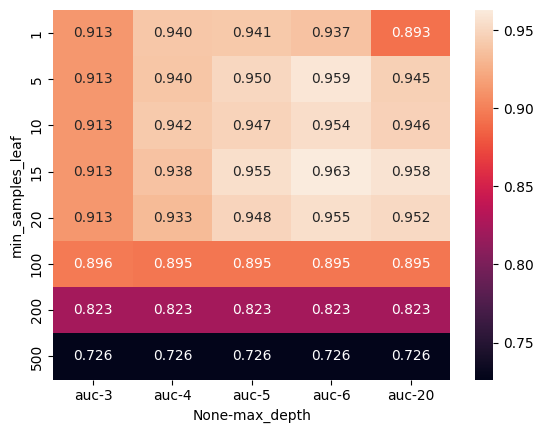

In [59]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [60]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [63]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.939840
1,20,0.960205
2,30,0.959070
3,40,0.957292
4,50,0.959129
5,60,0.959059
6,70,0.958883
7,80,0.958544
8,90,0.958520
9,100,0.959737


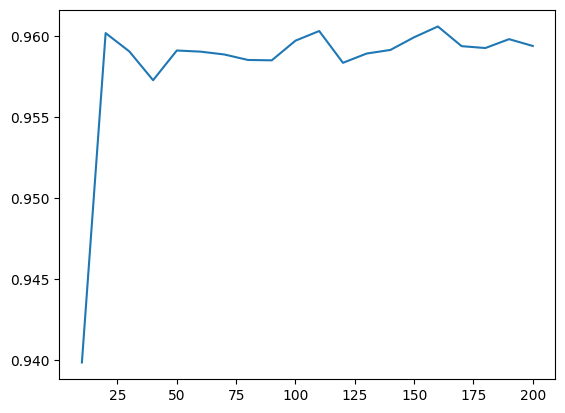

In [64]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [65]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [66]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.937863
1,5,20,0.954590
2,5,30,0.958287
3,5,40,0.958333
4,5,50,0.959293


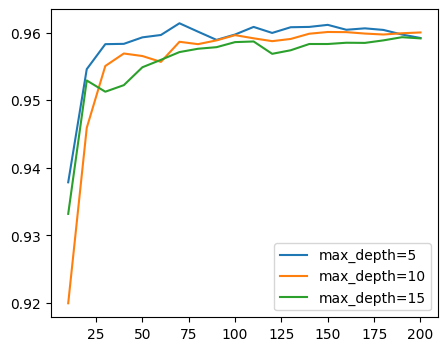

In [67]:
plt.figure(figsize=(5, 4))
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [68]:
max_depth = 5

In [69]:
#tuning min leaf parameter
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [70]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.937863
1,1,20,0.954590
2,1,30,0.958287
3,1,40,0.958333
4,1,50,0.959293


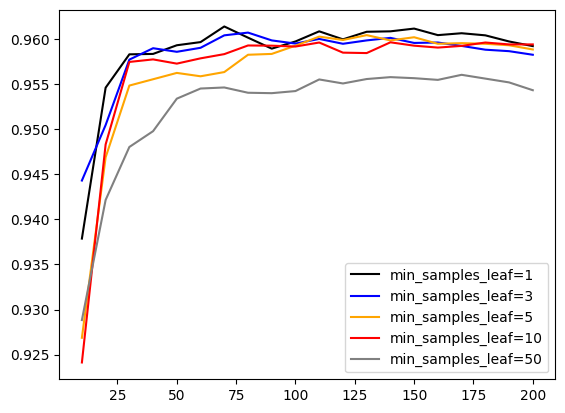

In [71]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

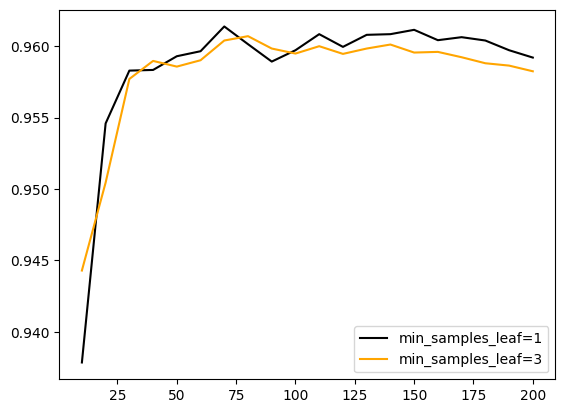

In [72]:
colors = ['black','orange']
values = [1, 3]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [73]:
min_samples_leaf = 1

In [74]:
rf = RandomForestClassifier(n_estimators=75,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=75, n_jobs=-1, random_state=1)

### Gradient Boosting

In [75]:
import xgboost as xgb

In [76]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [77]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [78]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [79]:
scores = {}

In [80]:
%%capture output
 
xgb_params = {
    'eta': 1,
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [81]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [82]:
scores.keys()

dict_keys(['eta=1'])

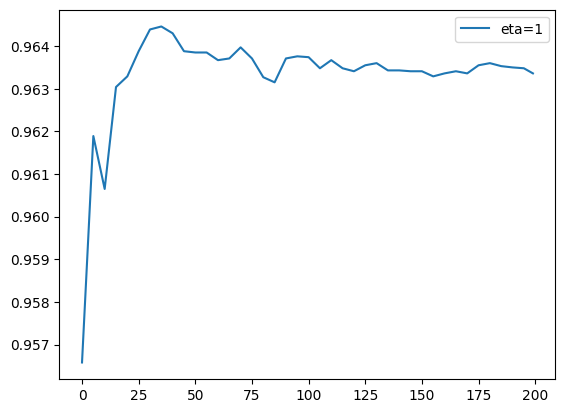

In [83]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Tuning max depth

In [84]:
scores = {}

In [85]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [86]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [87]:
scores.keys()

dict_keys(['max_depth=10'])

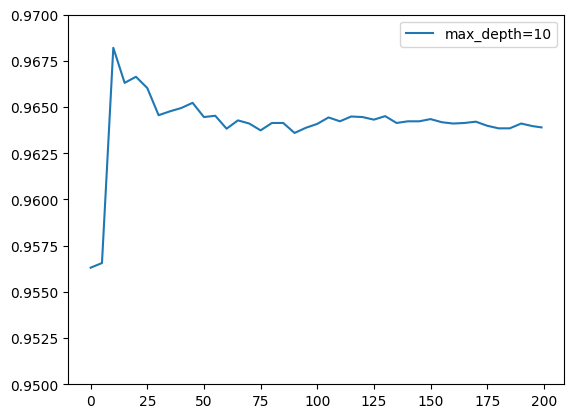

In [88]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
plt.ylim(0.95, 0.97)
plt.legend()

In [89]:
xgb_params_depth3 = {
    'eta': 0.3,
    'max_depth': 3,  # Set depth to 3
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


xgb_params_depth6 = xgb_params_depth3.copy()
xgb_params_depth6['max_depth'] = 6  

xgb_params_depth10 = xgb_params_depth3.copy()
xgb_params_depth10['max_depth'] = 10  


cv_results_depth3 = xgb.cv(
    params=xgb_params_depth3,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,  
    metrics="auc",
    early_stopping_rounds=10, 
    seed=1,
    verbose_eval=True
)


cv_results_depth6 = xgb.cv(
    params=xgb_params_depth6,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    metrics="auc",
    early_stopping_rounds=10,
    seed=1,
    verbose_eval=True
)

cv_results_depth10 = xgb.cv(
    params=xgb_params_depth10,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    metrics="auc",
    early_stopping_rounds=10,
    seed=1,
    verbose_eval=True
)


print("Best AUC for depth=3:", cv_results_depth3['test-auc-mean'].max())
print("Best AUC for depth=6:", cv_results_depth6['test-auc-mean'].max())
print("Best AUC for depth=10:", cv_results_depth10['test-auc-mean'].max())


[0]	train-auc:0.92087+0.00554	test-auc:0.90166+0.02037
[1]	train-auc:0.93566+0.00659	test-auc:0.92526+0.01517
[2]	train-auc:0.94522+0.00497	test-auc:0.93676+0.00793
[3]	train-auc:0.95335+0.00469	test-auc:0.94139+0.00846
[4]	train-auc:0.95496+0.00584	test-auc:0.94240+0.00976
[5]	train-auc:0.95748+0.00461	test-auc:0.94718+0.01176
[6]	train-auc:0.95886+0.00281	test-auc:0.94496+0.01101
[7]	train-auc:0.96136+0.00359	test-auc:0.94706+0.01298
[8]	train-auc:0.96292+0.00388	test-auc:0.94804+0.01334
[9]	train-auc:0.96418+0.00315	test-auc:0.94850+0.01241
[10]	train-auc:0.96643+0.00326	test-auc:0.94659+0.01178
[11]	train-auc:0.96842+0.00343	test-auc:0.94622+0.01263
[12]	train-auc:0.97079+0.00375	test-auc:0.94787+0.01293
[13]	train-auc:0.97222+0.00402	test-auc:0.94751+0.01428
[14]	train-auc:0.97396+0.00376	test-auc:0.94699+0.01473
[15]	train-auc:0.97557+0.00353	test-auc:0.94683+0.01559
[16]	train-auc:0.97704+0.00326	test-auc:0.94562+0.01570
[17]	train-auc:0.97819+0.00359	test-auc:0.94715+0.01529
[1

#### Tuning min_child_weight

In [90]:
scores = {}

In [91]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [92]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [93]:
scores.keys()

dict_keys(['min_child_weight=1'])

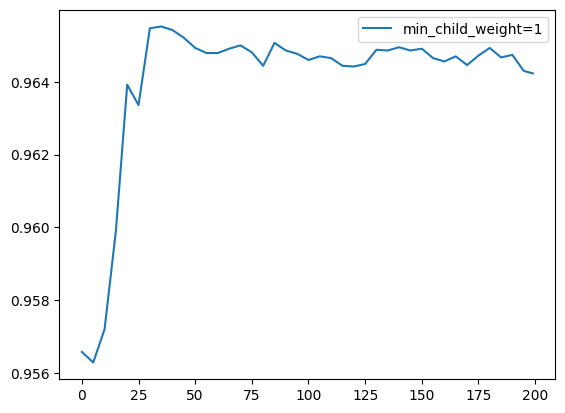

In [94]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.legend()

In [95]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Selecting Final Model

In [96]:
#logistic
model = LogisticRegression()
model.fit(X_train, y_train)

/home/ann/.local/share/virtualenvs/Alzheimer-s-prediction-R-502bKc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
#decision tree
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [98]:
#random forest
rf = RandomForestClassifier(n_estimators=75,
                            max_depth=5,
                            min_samples_leaf=1,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=75, n_jobs=-1, random_state=1)

In [99]:
#xgb
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
xg_model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [100]:
#logistic
y_pred = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8772693243496162)

In [101]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9618659928878908)

In [102]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9612811154781957)

In [103]:
# XGBoost Model
y_pred = xg_model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.9645564289724873)

We see that the XGBoost model has the best auc score. We’ll use this to train the final model.

In [106]:
df_full_train

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis,doctorincharge
0,6335,86,1,caucasian,high_school,30.266612,0,17.678579,9.608526,0.760175,...,1,0,4.474489,0,0,0,0,1,0,xxxconfid
1,5443,78,0,other,higher,27.671508,1,4.701039,5.871060,4.010200,...,1,0,7.226400,0,1,0,0,0,1,xxxconfid
2,5338,63,1,caucasian,bachelor's,26.565388,0,12.547105,2.991696,3.947475,...,0,0,2.350675,0,0,0,0,1,1,xxxconfid
3,5981,89,1,asian,high_school,32.606677,1,15.819011,7.129810,6.687003,...,0,0,4.693290,0,0,0,0,0,0,xxxconfid
4,5451,68,1,caucasian,higher,30.451765,0,4.407421,7.775759,9.971204,...,1,0,9.357797,0,0,0,0,0,1,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,5711,64,1,caucasian,bachelor's,30.141827,1,7.136678,0.810141,9.129962,...,0,0,9.462566,0,0,0,0,1,0,xxxconfid
1715,5656,61,1,african_american,bachelor's,34.531494,0,1.296193,9.174859,1.656669,...,0,0,9.856080,0,0,0,0,0,0,xxxconfid
1716,5847,74,0,caucasian,bachelor's,30.536551,1,10.881141,6.766458,7.654096,...,0,0,0.077927,1,0,1,0,0,0,xxxconfid
1717,4986,90,0,african_american,none,17.359614,1,3.538268,9.245893,9.240281,...,1,1,9.557954,0,0,0,0,1,1,xxxconfid


In [107]:
y_full_train = df_full_train['diagnosis']

In [108]:
y_full_train

0       0
1       1
2       1
3       0
4       1
       ..
1714    0
1715    0
1716    0
1717    1
1718    0
Name: diagnosis, Length: 1719, dtype: int64

In [109]:
del df_full_train['diagnosis']

In [115]:
del df_full_train['patientid']

In [116]:
del df_full_train['doctorincharge']

In [117]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [118]:
feature_names = list(dv.get_feature_names_out())
feature_names

['adl',
 'age',
 'alcoholconsumption',
 'behavioralproblems',
 'bmi',
 'cardiovasculardisease',
 'cholesterolhdl',
 'cholesterolldl',
 'cholesteroltotal',
 'cholesteroltriglycerides',
 'confusion',
 'depression',
 'diabetes',
 'diastolicbp',
 'dietquality',
 'difficultycompletingtasks',
 'disorientation',
 "educationlevel=bachelor's",
 'educationlevel=high_school',
 'educationlevel=higher',
 'educationlevel=none',
 'ethnicity=african_american',
 'ethnicity=asian',
 'ethnicity=caucasian',
 'ethnicity=other',
 'familyhistoryalzheimers',
 'forgetfulness',
 'functionalassessment',
 'gender',
 'headinjury',
 'hypertension',
 'memorycomplaints',
 'mmse',
 'personalitychanges',
 'physicalactivity',
 'sleepquality',
 'smoking',
 'systolicbp']

In [119]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [120]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
xg_model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [121]:
y_pred = xg_model.predict(dtest)
roc_auc_score(y_test, y_pred)

np.float64(0.9468865765319365)